In [ ]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

In [ ]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

1. The key factor that makes the difference between ideas that can, and cannot be examined and tested statistically is if there is enough data to compare the different variables to either accept or reject a null hypothesis. The key criteria for defining what a null hypothesis is that is must always assume no change or effect between variables in the study. The difference between the null hypothesis and the alternative hypothesis is that the alternative hypothesis is just the negation of the null, meaning that it suggests that there is an effect or change between variables in the study. 

2. The sentence above means when one is testing something, the individual data points from each sample are recorded and then a mean is found from each sample. The sample means are then all compared because they best represent the population of a whole. It is important to refer to the population perameter for outcomes of tests because they accuratley portray the population of a whole, which would give the best information to decide whether or not we can reject the null hypothesis or if there was an effect. 

3. We imagine a world where the null hypothesis is true when calculating the p value because we are assessing how surprising or extreme our data is in that world. 

4. A smaller p-value makes the null hypothesis look "more ridiculous" because it indicates that the observed data is highly unlikely to occur if the null hypothesis were true.

In [5]:
import numpy as np

# Observed data
observed_right_tilts = 80
total_couples = 124
prob_right = 0.5  # Null hypothesis: 50% chance of tilting right

# Number of simulations
n_simulations = 10000

# Simulate binomial outcomes (number of right tilts in each simulation)
simulated_tilts = np.random.binomial(total_couples, prob_right, n_simulations)

# Calculate p-value: proportion of simulations with at least as many right tilts as observed
p_value = np.mean(simulated_tilts >= observed_right_tilts)

print(f"P-value: {p_value:.5f}")

P-value: 0.00050


5. The P-value obtained from this data ended up being 0.0050. According to the table, there is very strong evidence against the null hypothesis. This suggests that we can reject the null hypothesis, meaning that humans most likley do have head tilt tendencies left or right when kissing.

ChatBot Link: https://chatgpt.com/share/67003b53-d5b0-8004-bde0-de3fe391aab0

6. A small p-value cannot definitively prove the null hypothesis is false because is a measure of liklihood, rather than certainty. While the p-value can provide evidence against a null hypothesis, it is only it is only an estimate of how likely the observed data would be if the null hypothesis were true.

7.  

Changed from:
abs(simulated_statistics - population_parameter_value_under_H0) >= ...
To:
simulated_statistics >= observed_statistic

This condition change makes it so it is testing whether the vaccine improves health scores, so it focuses only on simulated statistics that are greater than or equal to the observed statistic. We should expect the p-value to be smaller in the "one tailed" versus "two tailed" analysis because the "one tailed" test is more focused on one specific outcome. 

In [12]:
import pandas as pd
import numpy as np

# Sample data
patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate Health Score Change
patient_data['HealthScoreChange'] = patient_data['FinalHealthScore'] - patient_data['InitialHealthScore']

# One-sided hypothesis test (testing if proportion of positive changes > 0.5)
np.random.seed(1)  # Make simulation reproducible
number_of_simulations = 10000
n_size = len(patient_data)
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# Simulate random improvements assuming null hypothesis (no effect) is true
for i in range(number_of_simulations):
    random_improvement = np.random.choice([0, 1], size=n_size, replace=True)
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()

# Observed statistic: Proportion of positive health score changes
observed_statistic = (patient_data['HealthScoreChange'] > 0).mean()
population_parameter_value_under_H0 = 0.5

# One-tailed test: Are simulated statistics greater than or equal to observed?
SimStats_as_or_more_extreme_than_ObsStat = \
    IncreaseProportionSimulations_underH0random >= observed_statistic

# Calculate p-value (proportion of simulations as extreme as the observed)
p_value = SimStats_as_or_more_extreme_than_ObsStat.mean()

# Print results
print(f"Observed statistic (proportion of positive changes): {observed_statistic}")
print(f"One-tailed p-value: {p_value}")

Observed statistic (proportion of positive changes): 0.8
One-tailed p-value: 0.0565


ChatBot Link: https://chatgpt.com/share/67047fd7-8d34-8004-9533-a09be677fcf8

8. 

The original Fisher experiment had 8 cups, while the STA130 experiment involves 80 students, making the population much larger. This implies we need to account for a different sampling size and population structure when interpreting statistical significance.

Description of the population (and sample) and parameter of interest (and corresponding observed test statistic): the population in this analysis refers to all students of STA130 and the sample is 80 students. The parameter of interest is the probability that a randomly selected STA130 student can correctly identify which was poured first (milk or tea). 

Formal null hypothesis: we assume p=0.5, where p represents the probability of correctly identifying which was poured first

Informal null hypothesis: the students are guessing randomly and have no ability to disguingish between tea poured first or milk poured first

Alternative hypothesis: the students are not guessing randomly, and the proportion of students correctly identifying which was poured first is greater than 0.5.

Conclusion/analysis: based on the p-value being less than 0.05, we have evidence suggesting we can reject the null hypothesis. This implies that there is statistically significant evidence to support the alternative hypothesis, meaning students are not guessing randomly when it comes to milk or tea being poured first. The STA130 experiment provides a strong foundation for making conclusions about everyone's ability to distinguish between the two methods of pouring tea, resulting in possibly better evidence and easier to understand conclusions compared to Fisher's original story.

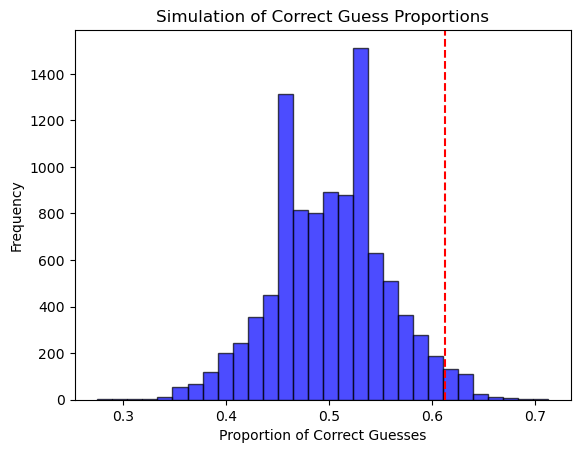

P-value: 0.0294
95% Confidence Interval for Proportion: (0.3875, 0.6125)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Given data
n_students = 80
n_correct = 49
p_null = 0.5  # Null hypothesis proportion

# Simulation parameters
n_simulations = 10000
simulated_successes = np.random.binomial(n_students, p_null, n_simulations)

# Calculate the p-value
observed_successes = n_correct
p_value = np.mean(simulated_successes >= observed_successes)

# Calculate confidence interval
ci_low = np.percentile(simulated_successes, 2.5)
ci_high = np.percentile(simulated_successes, 97.5)

# Visualizing the simulation results
plt.hist(simulated_successes / n_students, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(observed_successes / n_students, color='red', linestyle='dashed', linewidth=1.5)
plt.title('Simulation of Correct Guess Proportions')
plt.xlabel('Proportion of Correct Guesses')
plt.ylabel('Frequency')
plt.show()

print(f'P-value: {p_value}')
print(f'95% Confidence Interval for Proportion: ({ci_low/n_students}, {ci_high/n_students})')

ChatBot Link: https://chatgpt.com/share/6704869e-3f18-8004-b02e-385fedf364b5